<span style="color: red; font-size: 2em; font-weight: bold;">Example 1: Load - Fuel Generator</span>


 
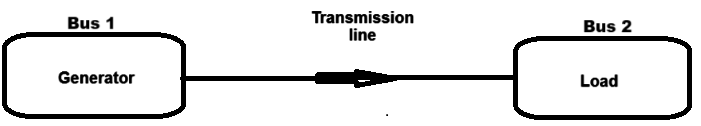

We’ll create a simple example network with:
    
    Two buses.
    A generator at one bus.
    A load at the other bus.
    A transmission line connecting them.

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\faaiz\AppData\Local\Temp\linopy-problem-tv8ny6ga.lp --output
 C:\Users\faaiz\AppData\Local\Temp\linopy-solve-3ax0nuci.sol
Reading problem data from 'C:\Users\faaiz\AppData\Local\Temp\linopy-problem-tv8ny6ga.lp'...
144 rows, 48 columns, 168 non-zeros
680 lines were read
GLPK Simplex Optimizer 5.0
144 rows, 48 columns, 168 non-zeros
Preprocessing...
~     0: obj =   1.680000000e+06  infeas =  0.000e+00
OPTIMAL SOLUTION FOUND BY LP PREPROCESSOR
Time used:   0.0 secs
Memory used: 0.1 Mb (97812 bytes)
Writing basic solution to 'C:\Users\faaiz\AppData\Local\Temp\linopy-solve-3ax0nuci.sol'...


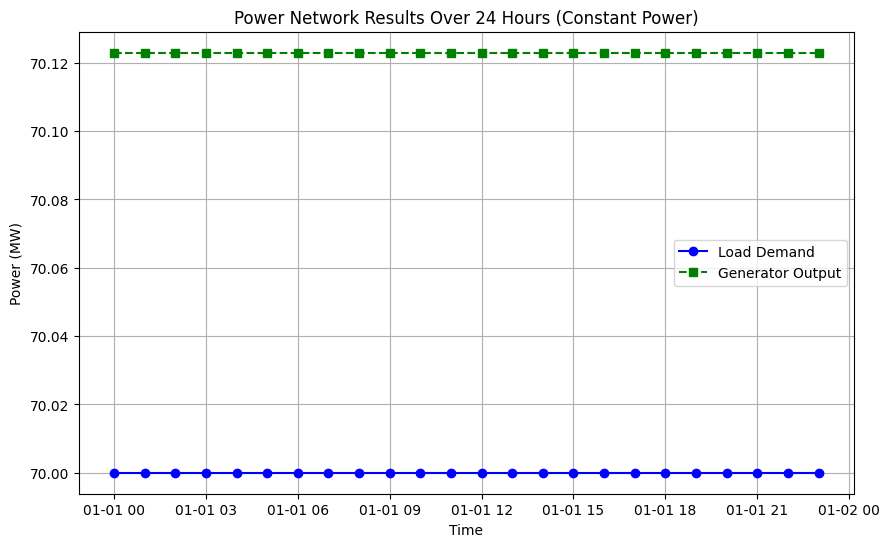

In [41]:
# Example 1 - Load _Fuel Generator One day 

import logging
import linopy
import pypsa
import pandas as pd
import matplotlib.pyplot as plt

# Suppress the info and debug messages for linopy and pypsa
logging.getLogger('pypsa').setLevel(logging.WARNING)
logging.getLogger('linopy').setLevel(logging.WARNING)

# 1 Create a new network
network = pypsa.Network()

# 2 Add two buses
network.add("Bus", "Bus 1", v_nom=20)
network.add("Bus", "Bus 2", v_nom=20)

# 3 Define the time snapshots (one day or 24 hours)
#hours = pd.date_range("2025-01-01", periods=24, freq="H") # Or
hours = pd.date_range("2023-01-01 00:00", "2023-01-01 23:00", freq="H")
network.set_snapshots(hours)

# 4 Add a fuel generator at Bus 1 with fixed power output
network.add("Generator", 
            "Generator 1",
            bus="Bus 1",
            p_nom = 100,
            p_max_pu = 1, 
            marginal_cost = 1000)


# 5 Add a transmission line between Bus 1 (Generator, AC) and Bus 2 (load, AC)
network.add("Line", 
            "Line 1",
            bus0 = "Bus 1",
            bus1 = "Bus 2",
            s_nom = 100,
            r = 0.01, 
            x = 0.03)

# 6 Add Load
# Set a **constant** load demand at Bus 2 (MW)
network.add("Load", 
            "Load 1",
            bus = "Bus 2",
            p_set = 70)

# 7 Solve the optimal power flow
network.optimize()

# Perform power flow calculations
network.lpf()  # Linear Power Flow
network.pf()   # Non-linear Power Flow



# 8 Extract results
y1 = load_results = network.loads_t.p
y2 = generator_results = network.generators_t.p


#x = time = load_results.index
x = time = hours



# 9 Plot all results in one figure
plt.figure(figsize=(10, 6))

# Plot Load Demand
plt.plot(x, y1, label="Load Demand", color="blue", linestyle="-", marker="o")

# Plot Generator Output
plt.plot(x, y2, label="Generator Output", color="green", linestyle="--", marker="s")

# Labels and Formatting
plt.title("Power Network Results Over 24 Hours (Constant Power)")
plt.xlabel("Time")
plt.ylabel("Power (MW)")
plt.legend()
plt.grid(True)

plt.show()

<span style="color: red; font-size: 2em; font-weight: bold;">Step by step code</span>

# Step 1: Setting Up the Environment

## Install PyPSA

In [ ]:
# You can install PyPSA using pip:
#!pip install pypsa

In [ ]:
# Import pypsa 
import pypsa

## Additional Libraries
PyPSA may require other libraries for plotting and numerical operations:

In [ ]:
# pip install numpy pandas matplotlib networkx

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Suppress the info and debug messages

In [ ]:
# Suppress the info and debug messages for linopy and pypsa
import logging
import linopy

logging.getLogger('pypsa').setLevel(logging.WARNING)
logging.getLogger('linopy').setLevel(logging.WARNING)

# Step 2: Creating Your Network:

## Creating an empty Network

In [2]:
# Create an empty network
network = pypsa.Network()

# Network: Represents the electrical network.

## Add buses

In [3]:
# Add 2 buses
network.add("Bus", "Bus 1", v_nom=20)
network.add("Bus", "Bus 2", v_nom=20)

#network.buses

    Bus: A bus represents a point in the system where power is injected or consumed. 
    It’s where all electrical components (load, generator) connect.
    
    v_nom: This is the nominal voltage of the bus. 
    For simplicity, we set it to 20 kV.

## Add a Generator

In [4]:
# Add a generator at Bus 1 with fixed power output
network.add("Generator", "Generator 2",
            bus="Bus 1",
            p_nom=50,  
            p_set=50,  # Fix generator output 
            marginal_cost=50)

Generator: Represents a generator that supplies power to the grid.

bus: This defines which bus the generator is connected to (Bus1).

p_nom: Nominal power capacity (in MW)

p_set: the real power it is generating (in MW )

marginal_cost=: Cost of generation ($/MWh)

## Add a Load
A load consumes power from the grid. Let’s add a load to Bus2 that will consume some power.

In [5]:
# Set a **constant** load demand at Bus 2
network.add("Load", "Load 1",
            bus="Bus 2",
            p_set=45)

Load: Represents a power consumer.

bus: The bus where the load is connected.

p_set: The real power demand of the load (in MW). 
We set it to 80 MW.
A Fixed load (MW)

q_set: The reactive power demand (in MVAR). 
We set it to 20 MVAR.
It is important for maintaining the voltage stability in the system.

## Add a Line
Now we will add a transmission line between two buses. For now, let’s set up the line between Bus1 and a second bus, Bus2.

In [6]:
# Add a transmission line connecting Bus 1 and Bus 2
network.add("Line", "Line 1",
            bus0="Bus 1",
            bus1="Bus 2",
            s_nom=50,
            r=0.01, x=0.03)

Line: Represents a transmission line between two buses.

bus0, bus1: The buses connected by the line.

         bus0="Bus 1",           # Start at Bus 1
         bus1="Bus 2",           # End at Bus 2

s_nom: Nominal capacity (MW)
 
x: The reactance of the line (in per unit). 
    
    It represents the line’s opposition to alternating current (AC) and impacts the phase difference between voltage and current.

r: The resistance of the line (in per unit). 
    
    It represents energy losses due to resistance in the transmission.

# Step 3: Check the designed network

In [7]:
# Print the network
print(network)

PyPSA Network
Components:
 - Bus: 2
 - Generator: 1
 - Line: 1
 - Load: 1
Snapshots: 1


C:\Users\faaiz\pypsa_env\lib\site-packages\pypsa\plot.py:230: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.axis(boundaries)


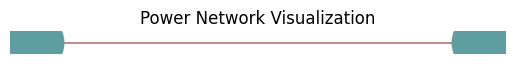

In [8]:
# Visualize the network

network.plot()
plt.title("Power Network Visualization")
plt.show()

## Define the time snapshots 

In [9]:
# Define the time snapshots (24 hours)
hours = pd.date_range("2025-02-09", periods=24, freq="H")
network.set_snapshots(hours)

# Step 4: Solving the Network
PyPSA includes tools for solving network power flows and optimization problems.

## Optimizing Dispatch
PyPSA can optimize generator dispatch to minimize costs:

In [10]:
#Install a Solver
#!pip install swiglpk

We will use the glpk solver. Alternatively, you can install other solvers like CPLEX or Gurobi if you need more advanced features or better performance. These solvers may require licenses.

In [11]:
# Run the following code in Python to check if the solver is available:
import pyomo.environ as pyo
print(pyo.SolverFactory("glpk").available())

True


In [12]:
# Solve the optimal power flow
network.optimize()

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\faaiz\AppData\Local\Temp\linopy-problem-zwom7sm3.lp --output
 C:\Users\faaiz\AppData\Local\Temp\linopy-solve-jn9jxnjz.sol
Reading problem data from 'C:\Users\faaiz\AppData\Local\Temp\linopy-problem-zwom7sm3.lp'...
144 rows, 48 columns, 168 non-zeros
680 lines were read
GLPK Simplex Optimizer 5.0
144 rows, 48 columns, 168 non-zeros
Preprocessing...
~     0: obj =   5.400000000e+04  infeas =  0.000e+00
OPTIMAL SOLUTION FOUND BY LP PREPROCESSOR
Time used:   0.0 secs
Memory used: 0.1 Mb (97812 bytes)
Writing basic solution to 'C:\Users\faaiz\AppData\Local\Temp\linopy-solve-jn9jxnjz.sol'...


('ok', 'optimal')

## Power Flow Calculation
We will now solve the network to find the power flow, voltages at each bus, and the power transmitted through the lines.

In [13]:
# Run the power flow calculation
network.lpf()  # Linear Power Flow (Faster)
network.pf()   # Full Power Flow (More accurate)

{'n_iter': SubNetwork           0
 snapshot              
 2025-02-09 00:00:00  2
 2025-02-09 01:00:00  2
 2025-02-09 02:00:00  2
 2025-02-09 03:00:00  2
 2025-02-09 04:00:00  2
 2025-02-09 05:00:00  2
 2025-02-09 06:00:00  2
 2025-02-09 07:00:00  2
 2025-02-09 08:00:00  2
 2025-02-09 09:00:00  2
 2025-02-09 10:00:00  2
 2025-02-09 11:00:00  2
 2025-02-09 12:00:00  2
 2025-02-09 13:00:00  2
 2025-02-09 14:00:00  2
 2025-02-09 15:00:00  2
 2025-02-09 16:00:00  2
 2025-02-09 17:00:00  2
 2025-02-09 18:00:00  2
 2025-02-09 19:00:00  2
 2025-02-09 20:00:00  2
 2025-02-09 21:00:00  2
 2025-02-09 22:00:00  2
 2025-02-09 23:00:00  2,
 'error': SubNetwork                      0
 snapshot                         
 2025-02-09 00:00:00  5.649392e-07
 2025-02-09 01:00:00  5.649392e-07
 2025-02-09 02:00:00  5.649392e-07
 2025-02-09 03:00:00  5.649392e-07
 2025-02-09 04:00:00  5.649392e-07
 2025-02-09 05:00:00  5.649392e-07
 2025-02-09 06:00:00  5.649392e-07
 2025-02-09 07:00:00  5.649392e-07
 2025-

## Examine Power Flows

You can inspect the power flows on lines and outputs of generators, loads and lines:

In [14]:
# Generator power outputs
print("Generator Output (in MW):")
print(network.generators_t.p)

Generator Output (in MW):
Generator            Generator 2
snapshot                        
2025-02-09 00:00:00    45.050739
2025-02-09 01:00:00    45.050739
2025-02-09 02:00:00    45.050739
2025-02-09 03:00:00    45.050739
2025-02-09 04:00:00    45.050739
2025-02-09 05:00:00    45.050739
2025-02-09 06:00:00    45.050739
2025-02-09 07:00:00    45.050739
2025-02-09 08:00:00    45.050739
2025-02-09 09:00:00    45.050739
2025-02-09 10:00:00    45.050739
2025-02-09 11:00:00    45.050739
2025-02-09 12:00:00    45.050739
2025-02-09 13:00:00    45.050739
2025-02-09 14:00:00    45.050739
2025-02-09 15:00:00    45.050739
2025-02-09 16:00:00    45.050739
2025-02-09 17:00:00    45.050739
2025-02-09 18:00:00    45.050739
2025-02-09 19:00:00    45.050739
2025-02-09 20:00:00    45.050739
2025-02-09 21:00:00    45.050739
2025-02-09 22:00:00    45.050739
2025-02-09 23:00:00    45.050739


In [15]:
# Load power Demand
print("Load Demand (in MW):")
print(network.loads_t.p)

Load Demand (in MW):
Load                 Load 1
snapshot                   
2025-02-09 00:00:00    45.0
2025-02-09 01:00:00    45.0
2025-02-09 02:00:00    45.0
2025-02-09 03:00:00    45.0
2025-02-09 04:00:00    45.0
2025-02-09 05:00:00    45.0
2025-02-09 06:00:00    45.0
2025-02-09 07:00:00    45.0
2025-02-09 08:00:00    45.0
2025-02-09 09:00:00    45.0
2025-02-09 10:00:00    45.0
2025-02-09 11:00:00    45.0
2025-02-09 12:00:00    45.0
2025-02-09 13:00:00    45.0
2025-02-09 14:00:00    45.0
2025-02-09 15:00:00    45.0
2025-02-09 16:00:00    45.0
2025-02-09 17:00:00    45.0
2025-02-09 18:00:00    45.0
2025-02-09 19:00:00    45.0
2025-02-09 20:00:00    45.0
2025-02-09 21:00:00    45.0
2025-02-09 22:00:00    45.0
2025-02-09 23:00:00    45.0


In [16]:
# Power flows on lines
print("Power flow at the start of lines")
print(network.lines_t.p0)

print(" \n\n Power flow at the end of lines")
print(network.lines_t.p1)

Power flow at the start of lines
                        Line 1
snapshot                      
2025-02-09 00:00:00  45.050739
2025-02-09 01:00:00  45.050739
2025-02-09 02:00:00  45.050739
2025-02-09 03:00:00  45.050739
2025-02-09 04:00:00  45.050739
2025-02-09 05:00:00  45.050739
2025-02-09 06:00:00  45.050739
2025-02-09 07:00:00  45.050739
2025-02-09 08:00:00  45.050739
2025-02-09 09:00:00  45.050739
2025-02-09 10:00:00  45.050739
2025-02-09 11:00:00  45.050739
2025-02-09 12:00:00  45.050739
2025-02-09 13:00:00  45.050739
2025-02-09 14:00:00  45.050739
2025-02-09 15:00:00  45.050739
2025-02-09 16:00:00  45.050739
2025-02-09 17:00:00  45.050739
2025-02-09 18:00:00  45.050739
2025-02-09 19:00:00  45.050739
2025-02-09 20:00:00  45.050739
2025-02-09 21:00:00  45.050739
2025-02-09 22:00:00  45.050739
2025-02-09 23:00:00  45.050739
 

 Power flow at the end of lines
                        Line 1
snapshot                      
2025-02-09 00:00:00 -44.999999
2025-02-09 01:00:00 -44.999999
20

## Voltage Angles

In [17]:
# Buses voltage angles:
print(" \n\n Buses voltage angles")
print(network.buses_t.v_ang)

 

 Buses voltage angles
Bus                  Bus 1     Bus 2
snapshot                            
2025-02-09 00:00:00    0.0 -0.003379
2025-02-09 01:00:00    0.0 -0.003379
2025-02-09 02:00:00    0.0 -0.003379
2025-02-09 03:00:00    0.0 -0.003379
2025-02-09 04:00:00    0.0 -0.003379
2025-02-09 05:00:00    0.0 -0.003379
2025-02-09 06:00:00    0.0 -0.003379
2025-02-09 07:00:00    0.0 -0.003379
2025-02-09 08:00:00    0.0 -0.003379
2025-02-09 09:00:00    0.0 -0.003379
2025-02-09 10:00:00    0.0 -0.003379
2025-02-09 11:00:00    0.0 -0.003379
2025-02-09 12:00:00    0.0 -0.003379
2025-02-09 13:00:00    0.0 -0.003379
2025-02-09 14:00:00    0.0 -0.003379
2025-02-09 15:00:00    0.0 -0.003379
2025-02-09 16:00:00    0.0 -0.003379
2025-02-09 17:00:00    0.0 -0.003379
2025-02-09 18:00:00    0.0 -0.003379
2025-02-09 19:00:00    0.0 -0.003379
2025-02-09 20:00:00    0.0 -0.003379
2025-02-09 21:00:00    0.0 -0.003379
2025-02-09 22:00:00    0.0 -0.003379
2025-02-09 23:00:00    0.0 -0.003379


# Step 5: Visualiz the power data

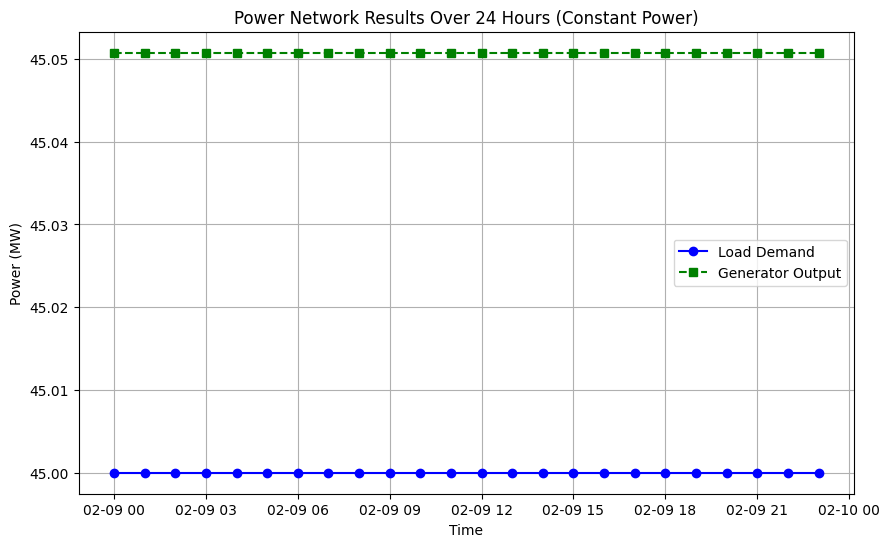

In [18]:
# Extract results
y1 = load_results = network.loads_t.p
y2 = generator_results = network.generators_t.p

x = time = load_results.index


# Plot all results in one figure
plt.figure(figsize=(10, 6))

# Plot Load Demand
plt.plot(x, y1, label="Load Demand", color="blue", linestyle="-", marker="o")

# Plot Generator Output
plt.plot(x, y2, label="Generator Output", color="green", linestyle="--", marker="s")

# Labels and Formatting
plt.title("Power Network Results Over 24 Hours (Constant Power)")
plt.xlabel("Time")
plt.ylabel("Power (MW)")
plt.legend()
plt.grid(True)

plt.show()